## Week 1. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

In [1]:
import warnings

import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings(action='ignore')
plt.style.use('ggplot')

### HW  
**1) (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  

In [3]:
def plot(n, a0, b0):
    '''
    Likelihood with p=0.8
    n
    prior ~ beta(a0, b0)
    '''
    # Likelihood
    y = n*0.8 
    def log_likelihood(theta, n, y):
        return y*np.log(theta)+(n-y)*np.log(1-theta)
    
    # Prior
    prior = st.beta(a=a0, b=b0)
    
    # Posterior
    post = st.beta(a=a0+y, b=b0+(n-y))
    
    # plotting
    thetas = np.linspace(0, 1, 300)[1:]
    plt.figure(figsize=(8, 6))
    plt.plot(thetas, np.log(prior.pdf(thetas)), label='log Prior', c='blue')
    plt.plot(thetas, log_likelihood(thetas, n, y), label='log Likelihood', c='orange')
    plt.plot(thetas, np.log(post.pdf(thetas)), label='log Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('log Density', fontsize=16)
    plt.legend()
    plt.show()

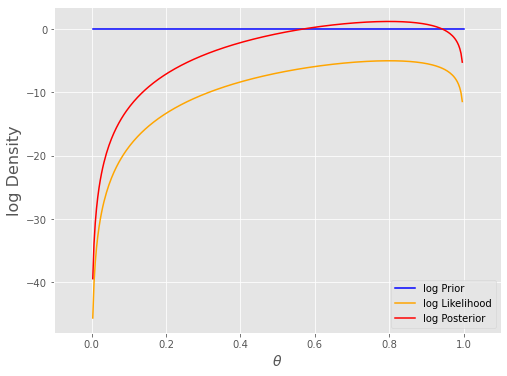

In [4]:
plot(n=10, a0=1, b0=1)

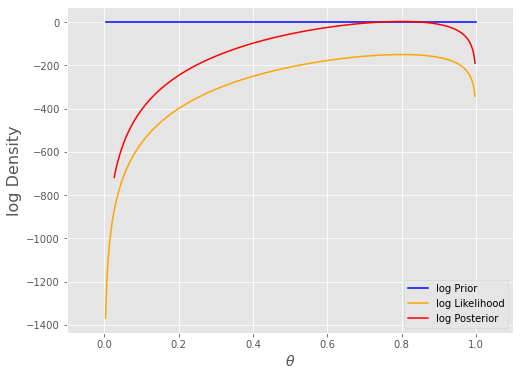

In [5]:
plot(n=300, a0=1, b0=1)

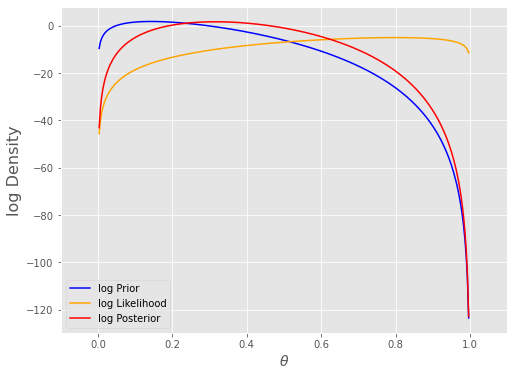

In [6]:
plot(n=10, a0=5, b0=25)

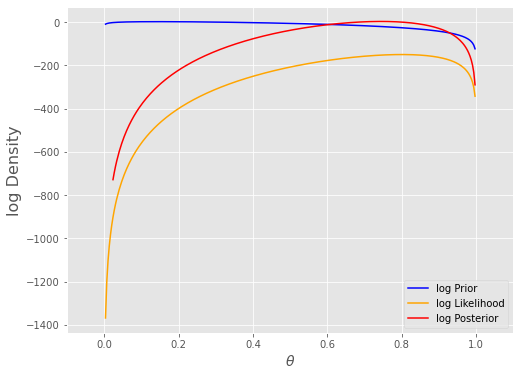

In [7]:
plot(n=300, a0=5, b0=25)

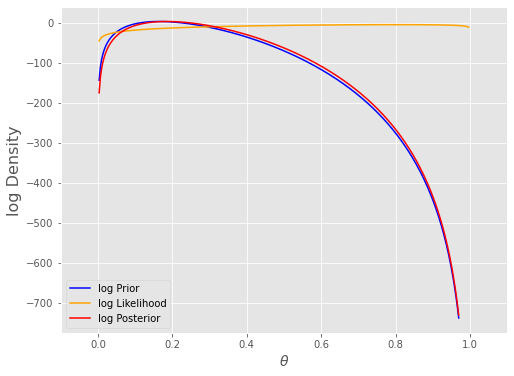

In [8]:
plot(n=10, a0=50, b0=250)

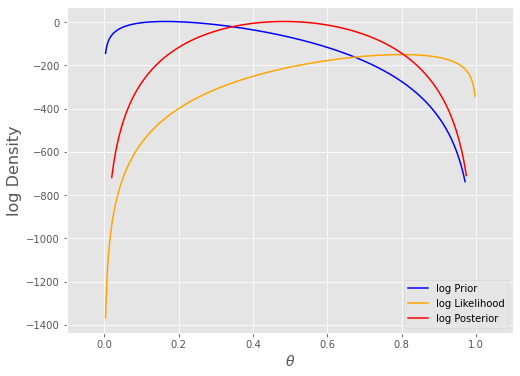

In [9]:
plot(n=300, a0=50, b0=250)

**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild has blue eyes. 
  
  

let A = $ 2 (1-p)^2 2p(1-p)$ : XX Xx 

let B = $(1-p)^2 (1-p)^2$  : XX XX

let C = $ 2p(1-p) 2p(1-p)$ : Xx Xx

위에

$${A*1/2+B*0+C*1/2\over A+B+C*3/4}$$

아래

$$D={A*(1/2*2/4*3/4^{n-1})+B*0+C*(1/2*2/4*3/4^{n-1})\over A*(1/2+1/2*3/4)^n+B*1^n+C*(1/4+2/4*3/4)^n}$$

$$\therefore  D * 2p(1-p) * 1/4 + D * p^2 * 1/2$$

**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter alpha, beta는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라 alpha, beta의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)

3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)

다른병원을 믿지 않는 frequentist이지만, 어느정도 봐줘서 Beta(9,1)

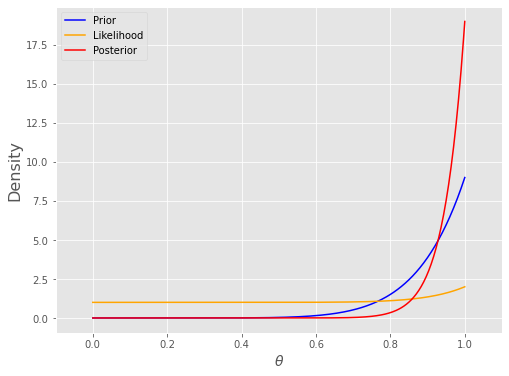

In [10]:
n, a0 = 10, 9

# Likelihood
y = n
def likelihood(theta, n, y):
    return theta**y+(1-theta)**(n-y)

# Prior
b0 = a0/9
prior = st.beta(a=a0, b=b0)

# Posterior
post = st.beta(a=a0+y, b=b0+(n-y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.show()

Posterior Predictive는 생략